In [ ]:
pip install tweepy

In [ ]:
import os
import tweepy as tw
import pandas as pd
import numpy as np


In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [ ]:
try:
  auth = tw.OAuthHandler(consumer_key, consumer_secret)
  auth.set_access_token(access_token, access_token_secret)
  api = tw.API(auth, wait_on_rate_limit=True)
except:
  print("Authentication Failed")

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
twitr = pd.read_csv("part.csv", header=None, encoding='mac_roman')
twitr.head()

0  ...             4
0                                                  1  ...             5
1                                                url  ...      username
2  https://twitter.com/kegeiger/status/1223389347...  ...      kegeiger
3  https://twitter.com/CHEMTRAILSMN/status/122338...  ...  CHEMTRAILSMN
4  https://twitter.com/ks10650/status/12233877477...  ...       ks10650

[5 rows x 5 columns]

In [ ]:
twitr.columns = ['url','date','content','id','username']
twitr.head()

url  ...      username
0                                                  1  ...             5
1                                                url  ...      username
2  https://twitter.com/kegeiger/status/1223389347...  ...      kegeiger
3  https://twitter.com/CHEMTRAILSMN/status/122338...  ...  CHEMTRAILSMN
4  https://twitter.com/ks10650/status/12233877477...  ...       ks10650

[5 rows x 5 columns]

In [ ]:
twitr

url  ...         username
0                                                      1  ...                5
1                                                    url  ...         username
2      https://twitter.com/kegeiger/status/1223389347...  ...         kegeiger
3      https://twitter.com/CHEMTRAILSMN/status/122338...  ...     CHEMTRAILSMN
4      https://twitter.com/ks10650/status/12233877477...  ...          ks10650
...                                                  ...  ...              ...
21050  https://twitter.com/Venomnymous/status/1317218...  ...      Venomnymous
21051  https://twitter.com/sucker4Mendes/status/13172...  ...    sucker4Mendes
21052  https://twitter.com/NewsbyMorB/status/13172124...  ...       NewsbyMorB
21053  https://twitter.com/Slabodkin/status/131721000...  ...        Slabodkin
21054  https://twitter.com/wrenaissanceman/status/131...  ...  wrenaissanceman

[21055 rows x 5 columns]

In [ ]:
#get the id
extract_tid = lambda x: x["url"].split("/")[-1]
twitr['id'] = twitr.apply(extract_tid, axis=1)

In [ ]:
twitr.head()

url  ...      username
0                                                  1  ...             5
1                                                url  ...      username
2  https://twitter.com/kegeiger/status/1223389347...  ...      kegeiger
3  https://twitter.com/CHEMTRAILSMN/status/122338...  ...  CHEMTRAILSMN
4  https://twitter.com/ks10650/status/12233877477...  ...       ks10650

[5 rows x 5 columns]

In [ ]:
#converting the content column into list
tweets = twitr['content'].to_list()
tweets

['3',
 'content',
 'Considering that the Whuhan Flu is probably a germ warfare virus created in a CPP Virology Lab..f*ck off China. OOPS we "accidentally" let it loose on our own population. #coronavirus #pandemic https://t.co/Mn26tce0Hs',
 'RED ALERT BREAKING NEWS: CORONAVIRUS UPDATE:\n#coronavirus #Corona_Virus #news #all #pandemic\nhttps://t.co/iklkscwcfh https://t.co/IdoDIIJIHO',
 '@richardhine @SenSchumer We‚Äö√Ñ√¥ll remember it as the preceding event to a #pandemic known as #operationcoronavirusdistraction as #coronavirus is here with no cure 90,000 ill. And it‚Äö√Ñ√¥s about to get ugly. Please focus on humanity. Not a govt run by someone in a symbolistic seat of leadership. #wuhan #humanity',
 '@DonaldJTrumpJr Mr. President, I write you again sir, in the name of the people &amp; humanity, and implore you to please start issuing orders of PSA services of proper outdoor prevention attire for stopping spread of #coronavirus before its #pandemic is the end of us. I beg mercyÔ£ø√º√¥√

In [ ]:
len(tweets)

21055

In [ ]:
tweets=np.unique(tweets)
tweets

array(['!!!  VERY Poignant... #TWEETofTheDay :  #Coronavirus #Covid19 #Pandemic #GeorgeFloyd #GeorgeFloydProtests  #SpaceX #NASA #Space #LaunchAmerica  #USA #EU #UK #Global https://t.co/1gnutXXXH3',
       '"\nCDC issues mandatory quarantine for first time in more than 50 years to Wuhan passengers in California" https://t.co/dbOSgeoPxA #CDC #quarantine #coronavirus',
       '" I will not die of having wagered my life that TV carnival barkers, political halfwits and MAGA-hat-wearing geniuses know more than experts with R.N.s, M.D.s, and Ph.D.s after their names.\n\nIn other words, I will not die of stupid."\n\n#COVID19 \n\nhttps://t.co/BknE1AR1LK',
       ...,
       '‚Äö√≥√® NEWS ‚Äö√≥√® #counterpunch #coronavirus ‚Äö√≤√ª Covid-19: Our #Health Crisis is Born of #Bigotry https://t.co/vPBgjgorrz',
       '‚Äö√≥√® NEWS ‚Äö√≥√® #counterpunch #pandemic #coronavirus ‚Äö√≤√ª Decarceration: #COVID19 is Opportunity Knocking https://t.co/0ak2TWP2xe',
       "√î¬∫√§Today's BGM√î¬∫√§ \n√î¬∫√§artis

In [ ]:
tweets=tweets.tolist()

In [ ]:
type(tweets)

list

In [ ]:
len(tweets)

20825

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import nltk
from nltk.corpus import stopwords
import re
from textblob import TextBlob
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
cleaned=[]
def preprocess_tweet(text):
  #url
  cleaned= " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", text).split())
  #lowercase
  cleaned= "".join(cleaned.lower())
  #usernames
  cleaned= "".join(re.sub('@[^\s]+', '', cleaned))
  #hashtag
  cleaned= "".join(re.sub('#([^\s]+)', '', cleaned))
  return cleaned

In [ ]:
map_object = map(preprocess_tweet, tweets)
cleaned_tweets = list(map_object)
cleaned_tweets

['very poignant tweetoftheday coronavirus covid19 pandemic georgefloyd georgefloydprotests spacex nasa space launchamerica usa eu uk global',
 'cdc issues mandatory quarantine for first time in more than 50 years to wuhan passengers in california cdc quarantine coronavirus',
 'i will not die of having wagered my life that tv carnival barkers political halfwits and magahatwearing geniuses know more than experts with rns mds and phds after their namesin other words i will not die of stupidcovid19',
 'nia ecghanaofficialcan continue with their activities nakufoaddo ghana covid19 coronavirus wearyourmask',
 'these productivity zealots forget that maintenance and care can still qualify as productive that sometimes we just need to work on being instead of doing dont feel like you have to be productive via goodmenproject coronavirus poetrycommunity',
 'antarctica and the covid19 pandemic taking a socialsciences and humanities perspectivein ecomagnewsantarctic antarcticness polargeopol polarrp

In [ ]:
twitr['content']=twitr['content'].apply(preprocess_tweet)

In [ ]:
twitr

url  ...         username
0                                                      1  ...                5
1                                                    url  ...         username
2      https://twitter.com/kegeiger/status/1223389347...  ...         kegeiger
3      https://twitter.com/CHEMTRAILSMN/status/122338...  ...     CHEMTRAILSMN
4      https://twitter.com/ks10650/status/12233877477...  ...          ks10650
...                                                  ...  ...              ...
21050  https://twitter.com/Venomnymous/status/1317218...  ...      Venomnymous
21051  https://twitter.com/sucker4Mendes/status/13172...  ...    sucker4Mendes
21052  https://twitter.com/NewsbyMorB/status/13172124...  ...       NewsbyMorB
21053  https://twitter.com/Slabodkin/status/131721000...  ...        Slabodkin
21054  https://twitter.com/wrenaissanceman/status/131...  ...  wrenaissanceman

[21055 rows x 5 columns]

In [ ]:
sentiment_objects = [TextBlob(tweet) for tweet in cleaned_tweets]

sentiment_objects[3].polarity, sentiment_objects[3]

(0.0,
 TextBlob("nia ecghanaofficialcan continue with their activities nakufoaddo ghana covid19 coronavirus wearyourmask"))

In [ ]:
sentiment_values = [[ str(tweet), tweet.sentiment.polarity] for tweet in sentiment_objects]

sentiment_values[1]

['cdc issues mandatory quarantine for first time in more than 50 years to wuhan passengers in california cdc quarantine coronavirus',
 0.375]

In [ ]:
sentiment_df = pd.DataFrame(sentiment_values, columns=["tweet","polarity"])

sentiment_df

tweet  polarity
0      very poignant tweetoftheday coronavirus covid1...     0.000
1      cdc issues mandatory quarantine for first time...     0.375
2      i will not die of having wagered my life that ...     0.125
3      nia ecghanaofficialcan continue with their act...     0.000
4      these productivity zealots forget that mainten...     0.000
...                                                  ...       ...
20820  news commondreams covid19 coronavirus jerry br...     0.000
20821  news commondreams pandemic now in us also 35 m...     0.400
20822  news counterpunch coronavirus covid19 our heal...     0.000
20823  news counterpunch pandemic coronavirus decarce...     0.000
20824  todays bgm artist dradnatsalbum my mind is mad...     0.000

[20825 rows x 2 columns]

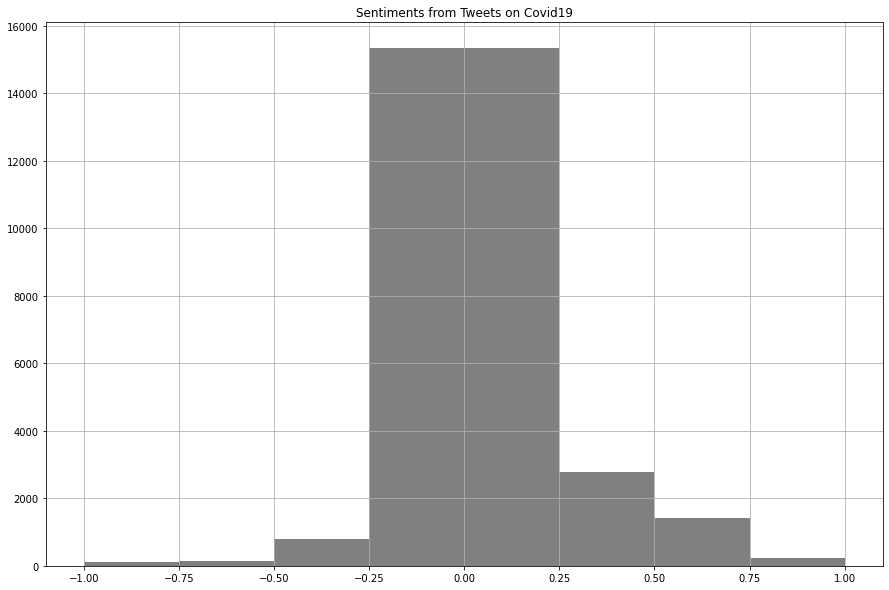

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

# Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="grey")

plt.title("Sentiments from Tweets on Covid19")
plt.show()

In [ ]:
def sentiment(polarity):
  if (polarity < 0):
    return 'negative'
  elif (polarity == 0):
    return 'neutral'
  else:
    return 'positive'


In [ ]:
sentiment_df['sentiment'] = sentiment_df['polarity'].apply(sentiment)


In [ ]:
sentiment_df.head(20)

tweet  polarity sentiment
0   very poignant tweetoftheday coronavirus covid1...  0.000000   neutral
1   cdc issues mandatory quarantine for first time...  0.375000  positive
2   i will not die of having wagered my life that ...  0.125000  positive
3   nia ecghanaofficialcan continue with their act...  0.000000   neutral
4   these productivity zealots forget that mainten...  0.000000   neutral
5   antarctica and the covid19 pandemic taking a s...  0.000000   neutral
6   bats have an immune system that lets them coex...  0.500000  positive
7   chinese markets still selling bats and slaught...  0.000000   neutral
8   coronavirus uk lockdown a fake text is warning... -0.333333  negative
9   coronavirus uklabour mp quits role after lockd... -0.400000  negative
10  coronavirus a contrived pandemic caused by a g... -0.500000  negative
11                coronavirus grounded special report  0.357143  positive
12  nevada study reports first confirmed covid19re...  0.325000  positive
13  northkorea convenes a covid19 meeting after ki...  0.000000   neutral
14  ontario schools will be closed at least until ... -0.200000  negative
15  pandemics pass eventually but the aftershock a...  0.000000   neutral
16  socialdistancing might be helping california a...  0.136364  positive
17  technology will not save usto fight the pandem...  0.500000  positive
18  tehran we got a problem coronavirus covid19 pa...  0.000000   neutral
19  trump s daily coronavirus press conference dev...  0.000000   neutral

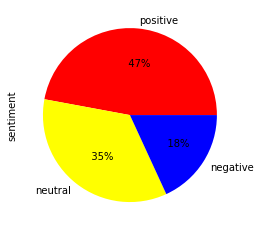

In [ ]:
sentiment_df.sentiment.value_counts().plot(kind='pie', autopct='%5.0f%%', colors=["red", "yellow", "blue"])

In [ ]:
neutral_df=sentiment_df.loc[sentiment_df['sentiment'] == 'neutral']
neutral_df

tweet  polarity sentiment
0      very poignant tweetoftheday coronavirus covid1...       0.0   neutral
3      nia ecghanaofficialcan continue with their act...       0.0   neutral
4      these productivity zealots forget that mainten...       0.0   neutral
5      antarctica and the covid19 pandemic taking a s...       0.0   neutral
7      chinese markets still selling bats and slaught...       0.0   neutral
...                                                  ...       ...       ...
20819  news commondreams coronavirus covid19 and the ...       0.0   neutral
20820  news commondreams covid19 coronavirus jerry br...       0.0   neutral
20822  news counterpunch coronavirus covid19 our heal...       0.0   neutral
20823  news counterpunch pandemic coronavirus decarce...       0.0   neutral
20824  todays bgm artist dradnatsalbum my mind is mad...       0.0   neutral

[7244 rows x 3 columns]

In [ ]:
!pip install pandas
!pip install numpy
!pip install nltk
!pip install stanfordnlp

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.wordnet import WordNetLemmatizer 
import stanfordnlp

In [ ]:
stanfordnlp.download('en')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 235M/235M [01:37<00:00, 2.41MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
neutral_list = neutral_df['tweet'].to_list()
neutral_list

['very poignant tweetoftheday coronavirus covid19 pandemic georgefloyd georgefloydprotests spacex nasa space launchamerica usa eu uk global',
 'nia ecghanaofficialcan continue with their activities nakufoaddo ghana covid19 coronavirus wearyourmask',
 'these productivity zealots forget that maintenance and care can still qualify as productive that sometimes we just need to work on being instead of doing dont feel like you have to be productive via goodmenproject coronavirus poetrycommunity',
 'antarctica and the covid19 pandemic taking a socialsciences and humanities perspectivein ecomagnewsantarctic antarcticness polargeopol polarrpi coronavirus covid19 covid2019 covid covid19 covid19 covid19outbreak covid19pandemic',
 'chinese markets still selling bats and slaughtering on bloodsoaked floors as beijing celebrates victory over coronavirusbatsoup wuhanvirus wuhancoronavirus covid19 wetmarkets pandemic kag2020 maga china chinaliedpeopledied chinavirus',
 'northkorea convenes a covid19 me

In [ ]:
new_list=[]
for line in neutral_list:
    txt_list = nltk.word_tokenize(line)
    taggedList = nltk.pos_tag(txt_list)
    new_list.append(taggedList)
    #print(taggedList)
new_list

[[('very', 'RB'),
  ('poignant', 'JJ'),
  ('tweetoftheday', 'NN'),
  ('coronavirus', 'NN'),
  ('covid19', 'VBP'),
  ('pandemic', 'JJ'),
  ('georgefloyd', 'NN'),
  ('georgefloydprotests', 'NNS'),
  ('spacex', 'VBP'),
  ('nasa', 'JJ'),
  ('space', 'NN'),
  ('launchamerica', 'NN'),
  ('usa', 'JJ'),
  ('eu', 'NN'),
  ('uk', 'NN'),
  ('global', 'JJ')],
 [('nia', 'JJ'),
  ('ecghanaofficialcan', 'JJ'),
  ('continue', 'NN'),
  ('with', 'IN'),
  ('their', 'PRP$'),
  ('activities', 'NNS'),
  ('nakufoaddo', 'IN'),
  ('ghana', 'NN'),
  ('covid19', 'NN'),
  ('coronavirus', 'NN'),
  ('wearyourmask', 'NN')],
 [('these', 'DT'),
  ('productivity', 'NN'),
  ('zealots', 'VBP'),
  ('forget', 'VB'),
  ('that', 'DT'),
  ('maintenance', 'NN'),
  ('and', 'CC'),
  ('care', 'NN'),
  ('can', 'MD'),
  ('still', 'RB'),
  ('qualify', 'VB'),
  ('as', 'IN'),
  ('productive', 'JJ'),
  ('that', 'IN'),
  ('sometimes', 'VBZ'),
  ('we', 'PRP'),
  ('just', 'RB'),
  ('need', 'VB'),
  ('to', 'TO'),
  ('work', 'VB'),
  ('on',

In [ ]:
len(new_list)

7244

In [ ]:
newwordList = []
flag = 0
for j in new_list:
  for i in range(0,len(j)-1):
    if (new_list[i][1]=="NN" and new_list[i+1][1]=="NN"):
        newwordList.append(new_list[i][0]+new_list[i+1][0])
        flag=1
    else:
        if (flag==1):

            flag=0
            continue
        newwordList.append(new_list[i][0])
        if (i==len(new_list)-2):
            newwordList.append(new_list[i+1][0])
finaltxt = '\n '.join(' '.join(word) for word in newwordList) 
#print(finaltxt)

In [ ]:
nlp = stanfordnlp.Pipeline()
doc = nlp(finaltxt)
dep_node = []
for dep_edge in doc.sentences[0].dependencies:
    dep_node.append([dep_edge[2].text, dep_edge[0].index, dep_edge[1]])
for i in range(0, len(dep_node)):
    if (int(dep_node[i][1]) != 0):
        dep_node[i][1] = newwordList[(int(dep_node[i][1]) - 1)]
print(dep_node)

Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_parser.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand

/usr/local/lib/python3.6/dist-packages/stanfordnlp/models/depparse/model.py:157: UserWarning: masked_fill_ received a mask with dtype torch.uint8, this behavior is now deprecated,please use a mask with dtype torch.bool instead. (Triggered internally at  /pytorch/aten/src/ATen/native/TensorAdvancedIndexing.cpp:570.)
  unlabeled_scores.masked_fill_(diag, -float('inf'))


[['very', ('nia', 'JJ'), 'advmod'], ['RB', ('these', 'DT'), 'compound'], ['nia', '0', 'root']]


In [ ]:
featureList = []
totalfeatureList=[]
categories = []
categoriesList=[]
for j in new_list:
  for i in j:
    if(i[1]=='JJ' or i[1]=='NN' or i[1]=='JJR' or i[1]=='NNS' or i[1]=='RB'):
        featureList.append(list(i))
        totalfeatureList.append(list(i)) # This list will store all the features for every sentence
        categories.append(i[0])
print(featureList)
print(categories)

[['very', 'RB'], ['poignant', 'JJ'], ['tweetoftheday', 'NN'], ['coronavirus', 'NN'], ['pandemic', 'JJ'], ['georgefloyd', 'NN'], ['georgefloydprotests', 'NNS'], ['nasa', 'JJ'], ['space', 'NN'], ['launchamerica', 'NN'], ['usa', 'JJ'], ['eu', 'NN'], ['uk', 'NN'], ['global', 'JJ'], ['nia', 'JJ'], ['ecghanaofficialcan', 'JJ'], ['continue', 'NN'], ['activities', 'NNS'], ['ghana', 'NN'], ['covid19', 'NN'], ['coronavirus', 'NN'], ['wearyourmask', 'NN'], ['productivity', 'NN'], ['maintenance', 'NN'], ['care', 'NN'], ['still', 'RB'], ['productive', 'JJ'], ['just', 'RB'], ['instead', 'RB'], ['dont', 'JJ'], ['feel', 'NN'], ['productive', 'JJ'], ['goodmenproject', 'JJ'], ['coronavirus', 'NN'], ['poetrycommunity', 'NN'], ['antarctica', 'NN'], ['covid19', 'NN'], ['pandemic', 'JJ'], ['socialsciences', 'NNS'], ['humanities', 'NNS'], ['ecomagnewsantarctic', 'JJ'], ['antarcticness', 'NN'], ['polargeopol', 'NN'], ['polarrpi', 'NN'], ['coronavirus', 'NN'], ['covid19', 'NN'], ['covid2019', 'NN'], ['covid', 

In [ ]:
fcluster = []
for i in featureList:
    filist = []
    for j in dep_node:
        if((j[0]==i[0] or j[1]==i[0]) and (j[2] in ["nsubj", "acl:relcl", "obj", "dobj", "agent", "advmod", "amod", "neg", "prep_of", "acomp", "xcomp", "compound"])):
            if(j[0]==i[0]):
                filist.append(j[1])
            else:
                filist.append(j[0])
    fcluster.append([i[0], filist])
print(fcluster)

[['very', [('nia', 'JJ')]], ['poignant', []], ['tweetoftheday', []], ['coronavirus', []], ['pandemic', []], ['georgefloyd', []], ['georgefloydprotests', []], ['nasa', []], ['space', []], ['launchamerica', []], ['usa', []], ['eu', []], ['uk', []], ['global', []], ['nia', []], ['ecghanaofficialcan', []], ['continue', []], ['activities', []], ['ghana', []], ['covid19', []], ['coronavirus', []], ['wearyourmask', []], ['productivity', []], ['maintenance', []], ['care', []], ['still', []], ['productive', []], ['just', []], ['instead', []], ['dont', []], ['feel', []], ['productive', []], ['goodmenproject', []], ['coronavirus', []], ['poetrycommunity', []], ['antarctica', []], ['covid19', []], ['pandemic', []], ['socialsciences', []], ['humanities', []], ['ecomagnewsantarctic', []], ['antarcticness', []], ['polargeopol', []], ['polarrpi', []], ['coronavirus', []], ['covid19', []], ['covid2019', []], ['covid', []], ['covid19', []], ['covid19', []], ['covid19outbreak', []], ['covid19pandemic', [

In [ ]:
finalcluster = []
dic = {}
for i in featureList:
    dic[i[0]] = i[1]
for i in fcluster:
    if(dic[i[0]]=="NN"):
        finalcluster.append(i)
print(finalcluster)

[['tweetoftheday', []], ['coronavirus', []], ['georgefloyd', []], ['nasa', []], ['space', []], ['launchamerica', []], ['eu', []], ['uk', []], ['continue', []], ['ghana', []], ['covid19', []], ['coronavirus', []], ['wearyourmask', []], ['productivity', []], ['maintenance', []], ['care', []], ['dont', []], ['feel', []], ['coronavirus', []], ['poetrycommunity', []], ['antarctica', []], ['covid19', []], ['antarcticness', []], ['polargeopol', []], ['polarrpi', []], ['coronavirus', []], ['covid19', []], ['covid2019', []], ['covid19', []], ['covid19', []], ['covid19outbreak', []], ['beijing', []], ['victory', []], ['coronavirusbatsoup', []], ['wuhanvirus', []], ['wuhancoronavirus', []], ['covid19', []], ['kag2020', []], ['maga', []], ['china', []], ['chinavirus', []], ['covid19', []], ['meeting', []], ['defector', []], ['covid19', []], ['coronavirus', []], ['aftershock', []], ['posttrauma', []], ['wave', []], ['earthquake', []], ['coronavirus', []], ['plague', []], ['coronavirus', []], ['covi

In [ ]:
len(finalcluster)

50904

In [ ]:
aspect_terms_neutral=list(zip(*finalcluster))[0]
aspect_terms_neutral

('tweetoftheday',
 'coronavirus',
 'georgefloyd',
 'nasa',
 'space',
 'launchamerica',
 'eu',
 'uk',
 'continue',
 'ghana',
 'covid19',
 'coronavirus',
 'wearyourmask',
 'productivity',
 'maintenance',
 'care',
 'dont',
 'feel',
 'coronavirus',
 'poetrycommunity',
 'antarctica',
 'covid19',
 'antarcticness',
 'polargeopol',
 'polarrpi',
 'coronavirus',
 'covid19',
 'covid2019',
 'covid19',
 'covid19',
 'covid19outbreak',
 'beijing',
 'victory',
 'coronavirusbatsoup',
 'wuhanvirus',
 'wuhancoronavirus',
 'covid19',
 'kag2020',
 'maga',
 'china',
 'chinavirus',
 'covid19',
 'meeting',
 'defector',
 'covid19',
 'coronavirus',
 'aftershock',
 'posttrauma',
 'wave',
 'earthquake',
 'coronavirus',
 'plague',
 'coronavirus',
 'covid19',
 'mentalhealth',
 'tehran',
 'problem',
 'coronavirus',
 'covid19',
 'trump',
 's',
 'coronavirus',
 'press',
 'conference',
 'mypillow',
 'dailykos',
 'xbox',
 'phil',
 'spencer',
 'coronavirus',
 'strategy',
 'console',
 'covid19',
 'gamepass',
 'interview',

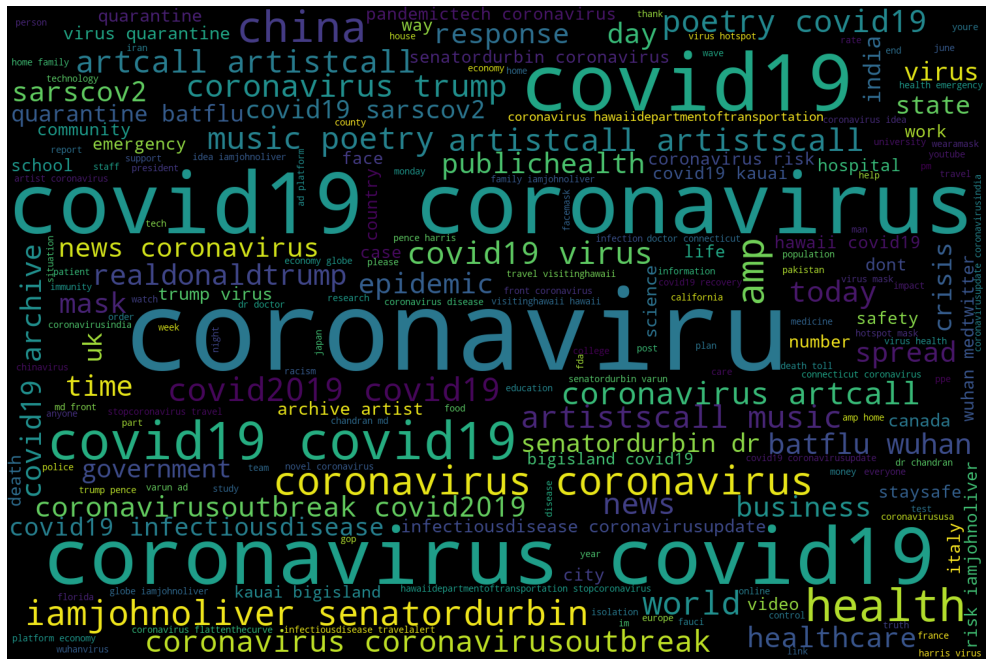

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
#convert list to string and generate
unique_string=(" ").join(aspect_terms_neutral)
wordcloud = WordCloud(width = 1500, height = 1000).generate(unique_string)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()